/home/asneto/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:754: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/home/asneto/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:760: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
/home/asneto/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:816: ComplexWarning: Casting complex values to real discards the imaginary part
  db = array(np.diff(bins), float)
/home/asneto/anaconda2/lib/python2.7/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/asneto/anaconda2/lib/python2.7/site-packages/matplotlib/transforms.py:2037: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


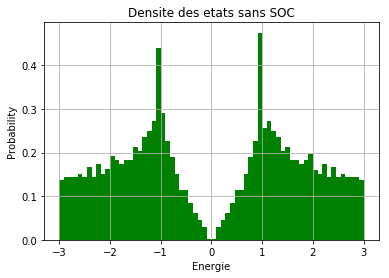

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace
from matplotlib.backends.backend_pdf import PdfPages

n1 = 66
n2 = n1
t = 1

#calcul de Hamiltonien avec la transformée de fourier


Hanalytique = np.zeros((2*n1*n2 ,2*n1*n2),dtype = 'complex')
Eingvect = np.zeros((2*n1*n2 ,2*n1*n2),dtype = 'complex')

Htemp = np.zeros((2,2), dtype = 'complex')




delta = np.array([[0.5,np.sqrt(3)*0.5],[0.5,-np.sqrt(3)*0.5],[-1,0]])

latticevect=(2.0*np.pi/3)*np.array([[1,np.sqrt(3)],[1,-np.sqrt(3)]])


pos = 0


for i in range(0,n1):
    
    for j in range(0,n2):

        kvect = (i/(n1*1.0))*latticevect[0,:] + (j/(n2*1.0))*latticevect[1,:]    
        
        deltak1 = np.dot(delta[1,:],kvect)
        
        deltak2 = np.dot(delta[2,:],kvect)
        
        deltak3 = np.dot(delta[0,:],kvect)
        
        
        Htemp = np.zeros((2,2), dtype = 'complex')
        
        Htemp[0,1]+= -t*(np.exp(1j*(deltak1)) + np.exp(1j*(deltak2)) +  np.exp(1j*(deltak3)))
        Htemp[1,0]+= -t*(np.exp(-1j*(deltak1)) + np.exp(-1j*(deltak2)) +  np.exp(-1j*(deltak3)))

        einval,eingvect = np.linalg.eig(Htemp)

  
        Hanalytique [pos,pos] += einval[0]
        Hanalytique [pos+1,pos+1] += einval[1]
        
        pos +=2
        

einval = np.diag(Hanalytique)


# the histogram of the data : density of states 

nbins = n1

x_Total = einval

plt.figure(1)

n_, bins_, patches_ = plt.hist(x_Total, nbins , normed=1, facecolor='green')

plt.ylabel('Probability')
plt.title('Densite des etats sans SOC')
plt.xlabel('Energie')
plt.grid(True)

plt.savefig("conedirac.pdf", bbox_inches='tight')

plt.show()
